In [1]:
import Pkg
Pkg.activate("Boris")

  Activating project at `~/Documents/Courses/Fall2024/Seminar/BorisPusher/Boris`


In [2]:
using Plots

In [3]:
include("integrators.jl")

boris_impA (generic function with 1 method)

In [4]:
# let's start with one particle of unit mass and charge
x_0 = [1/3, 1/4, 1/2];

# and initial velocity
v_0 = [2/5, 2/3, 1];

In [5]:
# numerical parameters
t0 = 0;
tf = 1;

# The errors in x and vk, v⊥ against different epsilon = 1/2^j are displayed in
# Fig. 8.1, where j = 4, . . . , 13.
j = 5;
epsilon = (1/2)^j;

# h = epsilon, 4*epsilon, 16*epsilon
h = epsilon;
nt = Int((tf - t0) / h + 1)

println("epsilon = ", epsilon)
println("h = ", h)
println("nt = ", nt)

epsilon = 0.03125
h = 0.03125
nt = 33


In [6]:
x_tSB, v_tSB = boris(x_0, v_0, (t0, tf), nt, epsilon);
x_tBEA, v_tBEA = boris_expA(x_0, v_0, (t0, tf), nt, epsilon);
x_tBIA, v_tBIA = boris_impA(x_0, v_0, (t0, tf), nt, epsilon);
x_tRK, v_tRK = runge_kutta(x_0, v_0, (t0, tf), nt, epsilon);

In [7]:
println(x_tSB[1, 3])
println(x_tBEA[1, 3])
println(x_tBIA[1, 3])
println(x_tRK[1, 3])

0.3906876320803871
0.3894539524963516
0.38865913965797055
0.3828909377068901


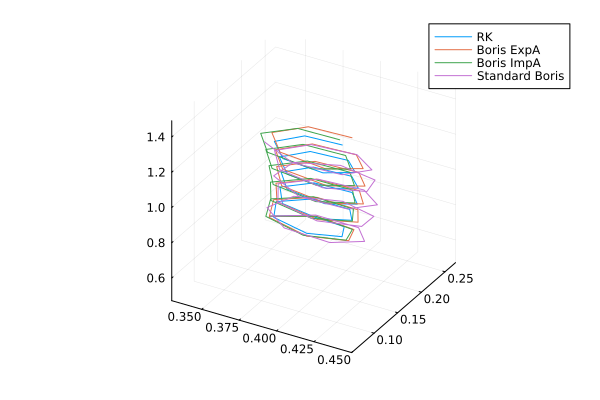

In [8]:
plot(x_tRK[1, :], x_tRK[2, :], x_tRK[3, :], label="RK")
plot!(x_tBEA[1, :], x_tBEA[2, :], x_tBEA[3, :], label="Boris ExpA")
plot!(x_tBIA[1, :], x_tBIA[2, :], x_tBIA[3, :], label="Boris ImpA")
plot!(x_tSB[1, :], x_tSB[2, :], x_tSB[3, :], label="Standard Boris")

In [9]:
sqrt.(sum((x_tBIA .- x_tBEA).^2, dims=1))[:]

33-element Vector{Float64}:
 0.0
 0.000507541000648164
 0.0012216992730606044
 0.001821486778687644
 0.00215675777553659
 0.002215610800203886
 0.0021023970694454583
 0.0022234076186712958
 0.0029068664441393804
 0.0037606214854688097
 ⋮
 0.012522847818351756
 0.0131604349191509
 0.01425427920525029
 0.0156431416972207
 0.016897582744505358
 0.017790048864658722
 0.018516696929298256
 0.01943912967988847
 0.020767665405936983

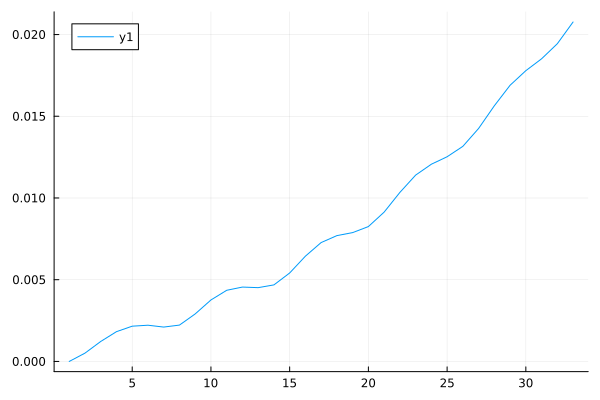

In [10]:
# make log
plot(sqrt.(sum((x_tBIA .- x_tBEA).^2, dims=1))[:])
# # make log
# plot!(abs.(x_tBIA[2, :]-x_tBEA[2, :]))
# # make log
# plot!(abs.(x_tBIA[3, :]-x_tBEA[3, :]))

In [11]:
x_tBIA

3×33 Matrix{Float64}:
 0.333333  0.359384  0.388659  0.394843  …  0.371027  0.389502  0.420104
 0.25      0.263818  0.248826  0.215648     0.110729  0.130137  0.122464
 0.5       0.531661  0.563306  0.594316     1.3862    1.41431   1.44255

In [12]:
# The errors in x and vk, v⊥ against different epsilon = 1/2^j are displayed in
# Fig. 8.1, where 

# array to store the errors
error_SB = [];
error_BEA = [];
error_BIA = [];
epsilons = [];
for j in 4:13
    epsilon = (1/2)^j;
    push!(epsilons, epsilon)

    # h = epsilon, 4*epsilon, 16*epsilon
    h = epsilon;
    nt = Int((tf - t0) / h + 1)
    println("nt = ", nt)

    x_tSB, v_tSB = boris(x_0, v_0, (t0, tf), nt, epsilon);
    x_tRK, v_tRK = runge_kutta(x_0, v_0, (t0, tf), nt, epsilon);
    x_tBEA, v_tBEA = boris_expA(x_0, v_0, (t0, tf), nt, epsilon);
    x_tBIA, v_tBIA = boris_impA(x_0, v_0, (t0, tf), nt, epsilon);

    # mean square error
    push!(error_SB, sum(sqrt.(sum((x_tRK .- x_tSB).^2, dims=1)))/nt)
    push!(error_BEA, sum(sqrt.(sum((x_tRK .- x_tBEA).^2, dims=1)))/nt)
    push!(error_BIA, sum(sqrt.(sum((x_tRK .- x_tBIA).^2, dims=1)))/nt)

end
println("j = ", j)


nt = 17
nt = 33
nt = 65
nt = 129
nt = 257
nt = 513
nt = 1025
nt = 2049
nt = 4097
nt = 8193
j = 5


For the numerical results to provide a good approximation to the trajectory we require that the difference. where is some defined error tolerance, at each solution point. This difference is called the global error and is the accumulated error over all solution steps

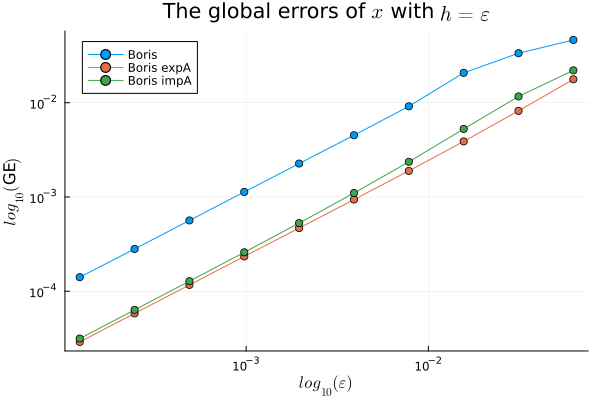

In [13]:
# log-log plot
plot(epsilons, error_SB, label="Boris", xscale=:log10, yscale=:log10, marker=:circle)
plot!(epsilons, error_BEA, label="Boris expA", xscale=:log10, yscale=:log10, marker=:circle)
plot!(epsilons, error_BIA, label="Boris impA", xscale=:log10, yscale=:log10, marker=:circle)

plot!(xlabel=s"$log_{10}(\epsilon)$", ylabel=s"$log_{10}($GE$)$")
plot!(title=s"The global errors of $x$ with $h=\epsilon$")